In [1]:
%matplotlib inline
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE 
from sklearn.cluster import KMeans

In [10]:
# Only using the top 15 PCs
pc = np.load('./PCA_top100.npy')
pc = pc[:,0:15]
print(np.shape(pc))

(2504, 15)


In [2]:
#Parse data into array
# data = []
# with open('df_vcf_filt_ld.csv') as f:
#     line = f.readline()
#     while line:
#         line = f.readline()
#         data += [line.split(",")]

In [3]:
#Parse information based on number of 1s in each column
# df = []
# for i, line in enumerate(data):
#     l = [v.count('1') for v in line[-2504:]]
#     if len(l) == 2504:
#         df += [l]

In [11]:
#Perform tSNE
tSNE = TSNE(n_components=2).fit_transform(pc)
print(np.shape(tSNE))

(2504, 2)


In [12]:
print(tSNE)

[[ 28.26250648 -28.51447105]
 [ 47.2684288  -10.33208752]
 [ 31.43949509 -32.12748718]
 ..., 
 [-11.61446762 -42.83850479]
 [-13.61323071 -43.40546799]
 [-14.12790489 -41.57762527]]


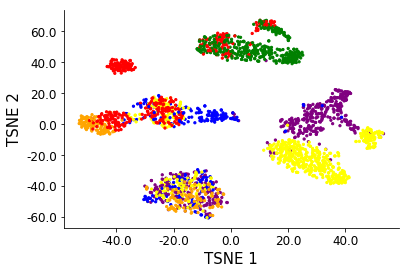

In [13]:
#Plot tSNE data

#Load population labels
sample_to_pop = {}
with open("df_pop.csv", "r") as f:
    for line in f:  
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

pop_to_color = {"ACB": "blue", "ASW": "blue", "BEB": "blue", 
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green",
                 "CEU": "yellow", "ESN": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "ITU": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PJL": "purple", "PUR": "purple", "STU": "purple",
                "GIH": "orange", "GWD": "orange",
                "KHV": "red", "LWK": "red","MSL": "red", "YRI": "red",   
               }

colors = []
sample_names = []
for sample in sample_to_pop.values():
    if len(sample) == 3:
        color = pop_to_color[sample]
        colors.append(color)    
    
tsne1 = tSNE[0:, 0:1].transpose()[0]
tsne2 = tSNE[0:, 1:2].transpose()[0]

# Make the plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tsne1, tsne2, color=colors, s=5)
ax.set_xlabel("TSNE 1", size=15)
ax.set_ylabel("TSNE 2", size=15)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(ax.get_yticks(), size=12)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();

In [14]:
#Perform kmeans clustering into 6 clusters
km = KMeans(n_clusters=6).fit(tSNE)

In [15]:
group_one = []
group_two = []
group_three = []
group_four = []
group_five = []
group_six = []
for i,c in enumerate(km.labels_):
    if c == 0:
        group_one += [i]
    elif c == 1:
        group_two += [i]
    elif c == 2:
        group_three += [i]
    elif c == 3:
        group_four += [i]
    elif c == 4:
        group_five += [i]
    elif c == 5:
        group_six += [i]
    else:
        print("This should never print")

In [16]:
pop = []
with open("df_pop.csv", "r") as f:
    line += f.readline()
    while line:
        line = f.readline()
        parse = line.strip().split(",")
        if len(parse) == 2:
            pop += [parse[1]]

In [17]:
#split each group up according to the population color to see if it was colored correctly.
#Legend: [blue, green, yellow, purple, orange, red]
blue = ["ACB", "ASW", "BEB"]
green = ["CDX", "CHB", "CHS", "JPT"]
yellow = ["CEU", "ESN", "FIN", "GBR", "IBS", "ITU", "TSI"]
purple = ["CLM", "MXL", "PEL", "PJL", "PUR", "STU"]
orange = ["GIH", "GWD"]
red = ["KHV", "LWK", "MSL", "YRI"]

In [18]:
#group_one
group_one_count = [0, 0, 0, 0, 0, 0]
for i in group_one:
    if pop[i] in blue:
        group_one_count[0] += 1
    elif pop[i] in green:
        group_one_count[1] += 1
    elif pop[i] in yellow:
        group_one_count[2] += 1
    elif pop[i] in purple:
        group_one_count[3] += 1
    elif pop[i] in orange:
        group_one_count[4] += 1
    elif pop[i] in red:
        group_one_count[5] += 1
    else:
        print(pop[i])

print("Group 1. Legend Index:")
print(group_one_count.index(max(group_one_count)))
print("Accuracy:")
print(max(group_one_count)/float(len(group_one_count)))

Group 1. Legend Index:
0
Accuracy:
22.166666666666668


In [19]:
#group_two
group_two_count = [0, 0, 0, 0, 0, 0]
for i in group_two:
    if pop[i] in blue:
        group_two_count[0] += 1
    elif pop[i] in green:
        group_two_count[1] += 1
    elif pop[i] in yellow:
        group_two_count[2] += 1
    elif pop[i] in purple:
        group_two_count[3] += 1
    elif pop[i] in orange:
        group_two_count[4] += 1
    elif pop[i] in red:
        group_two_count[5] += 1
    else:
        print(pop[i])

print("Group 2. Legend Index:")
print(group_two_count.index(max(group_two_count)))
print("Accuracy:")
print(max(group_two_count)/float(len(group_two_count)))

Group 2. Legend Index:
2
Accuracy:
67.83333333333333


In [20]:
#group_three
group_three_count = [0, 0, 0, 0, 0, 0]
for i in group_three:
    if pop[i] in blue:
        group_three_count[0] += 1
    elif pop[i] in green:
        group_three_count[1] += 1
    elif pop[i] in yellow:
        group_three_count[2] += 1
    elif pop[i] in purple:
        group_three_count[3] += 1
    elif pop[i] in orange:
        group_three_count[4] += 1
    elif pop[i] in red:
        group_three_count[5] += 1
    else:
        print(pop[i])

print("Group 3. Legend Index:")
print(group_three_count.index(max(group_three_count)))
print("Accuracy:")
print(max(group_three_count)/float(len(group_three_count)))

Group 3. Legend Index:
1
Accuracy:
67.5


In [21]:
#group_four
group_four_count = [0, 0, 0, 0, 0, 0]
for i in group_four:
    if pop[i] in blue:
        group_four_count[0] += 1
    elif pop[i] in green:
        group_four_count[1] += 1
    elif pop[i] in yellow:
        group_four_count[2] += 1
    elif pop[i] in purple:
        group_four_count[3] += 1
    elif pop[i] in orange:
        group_four_count[4] += 1
    elif pop[i] in red:
        group_four_count[5] += 1
    else:
        print(pop[i])

print("Group 4. Legend Index:")
print(group_four_count.index(max(group_four_count)))
print("Accuracy:")
print(max(group_four_count)/float(len(group_four_count)))

Group 4. Legend Index:
3
Accuracy:
33.0


In [22]:
#group_five
group_five_count = [0, 0, 0, 0, 0, 0]
for i in group_five:
    if pop[i] in blue:
        group_five_count[0] += 1
    elif pop[i] in green:
        group_five_count[1] += 1
    elif pop[i] in yellow:
        group_five_count[2] += 1
    elif pop[i] in purple:
        group_five_count[3] += 1
    elif pop[i] in orange:
        group_five_count[4] += 1
    elif pop[i] in red:
        group_five_count[5] += 1
    else:
        print(pop[i])

print("Group 5. Legend Index:")
print(group_five_count.index(max(group_five_count)))
print("Accuracy:")
print(max(group_five_count)/float(len(group_five_count)))

Group 5. Legend Index:
5
Accuracy:
31.0


In [23]:
#group_six
group_six_count = [0, 0, 0, 0, 0, 0]
for i in group_six:
    if pop[i] in blue:
        group_six_count[0] += 1
    elif pop[i] in green:
        group_six_count[1] += 1
    elif pop[i] in yellow:
        group_six_count[2] += 1
    elif pop[i] in purple:
        group_six_count[3] += 1
    elif pop[i] in orange:
        group_six_count[4] += 1
    elif pop[i] in red:
        group_six_count[5] += 1
    else:
        print(pop[i])

print("Group 6. Legend Index:")
print(group_six_count.index(max(group_six_count)))
print("Accuracy:")
print(max(group_six_count)/float(len(group_six_count)))

Group 6. Legend Index:
3
Accuracy:
53.166666666666664
